In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification 

## Logistic Regression

In [4]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

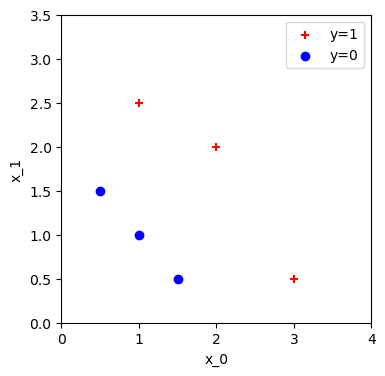

In [8]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
def plot_data(X, y, ax):
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    ax.scatter(X[pos][:, 0], X[pos][:, 1], c='r', marker='+', label='y=1')
    ax.scatter(X[neg][:, 0], X[neg][:, 1], c='b', marker='o', label='y=0')
    ax.legend()

plot_data(X,y,ax)
ax.axis([0,4,0,3.5])
ax.set_ylabel('x_1')
ax.set_xlabel('x_0')
plt.show()




### Decision Boundry

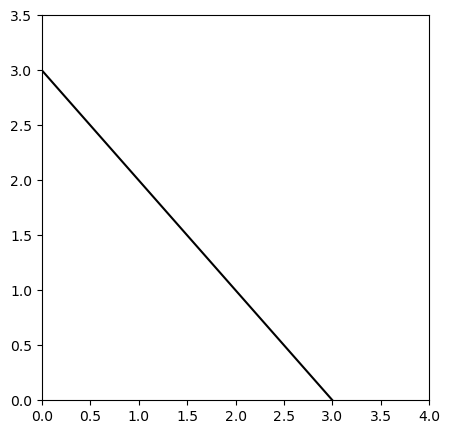

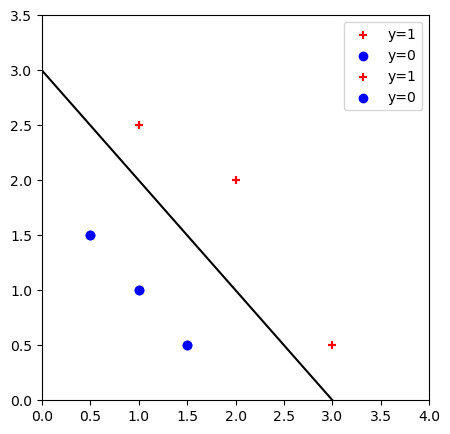

In [14]:
# THe Decision Boundry equation is w_0 x_0+w_1x_1 + b Here w_1 = 1 , w_2 = 1 and b = -3 
# So 1*x_0+1*x_1 - 3 = x_0+x_1 -3
x1 = np.arange(0,6)
x0 = 3-x1
fig , ax = plt.subplots(1,1,figsize = (5,5))
ax.plot(x0,x1,c = "black")
ax.axis([0, 4, 0, 3.5])
# THe Decision Boundry equation is w_0 x_0+w_1x_1 + b Here w_1 = 1 , w_2 = 1 and b = -3 
# So 1*x_0+1*x_1 - 3 = x_0+x_1 -3
x1 = np.arange(0,6)
x0 = 3-x1
fig , ax = plt.subplots(1,1,figsize = (5,5))
plot_data(X,y,ax)
ax.plot(x0,x1,c = "black")
ax.axis([0, 4, 0, 3.5])
plot_data(X,y,ax)

#### Sigmoid Function

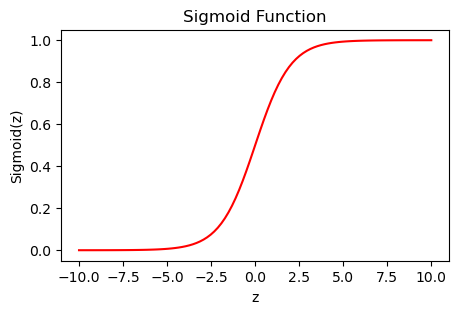

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

# Add a bias term (intercept) to X
X = np.insert(X, 0, 1, axis=1)

# Initialize weights
w = np.random.randn(X.shape[1], 1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis function
def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

z = np.linspace(-10, 10, 100)
sigmoid_z = sigmoid(z)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z, sigmoid_z, c='r')
ax.set_title('Sigmoid Function')
ax.set_xlabel('z')
ax.set_ylabel('Sigmoid(z)')
plt.show()


### Cost Function 

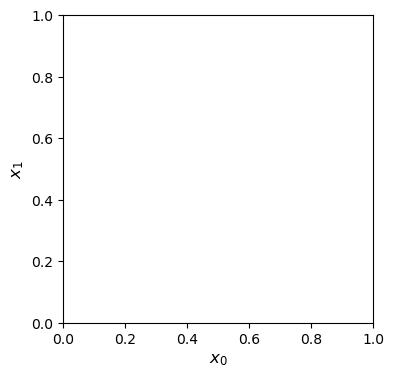

In [45]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  # (m, n)
y_train = np.array([0, 0, 0, 1, 1, 1])  
fig,ax = plt.subplots(1,1 ,figsize = (4,4))
def plot_data(X, y, ax):
    pos = y == 1
    neg = y == 0
    ax.scatter(X[pos, 0], X[pos, 1], c='r', marker='+', label='y=1')
    ax.scatter(X[neg, 0], X[neg, 1], c='b', marker='o', label='y=0')
    ax.legend()
    ax.axis([0,4,0,3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [58]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))
def compute_cost(X,y,w,b):
    cost = 0.0
    m = X.shape[0]
    for i in range(m):
        z = np.dot(w , X[i]) +b
        fw_b = sigmoid(z)
        cost += (-y[i] *np.log(fw_b)-(1-y[i])* np.log(1-fw_b)) 
    cost = cost/m
    return cost

In [60]:
temp_w = np.array([1,1])
temp_b = -3
print(compute_cost(X_train , y_train , temp_w , temp_b))


0.36686678640551745


##### The decision Boundry for X1 X2 , the b values are different To check b = -3 , and b = 4 

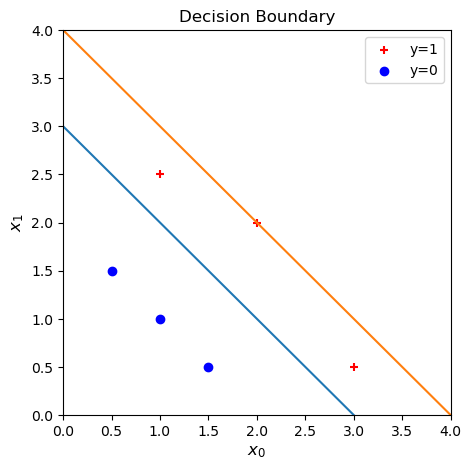

In [63]:
# For b = 4 and b =3 
x0 = np.arange(0,6)
x1 = 3 - x0
x1_other = 4-x0
fig , ax = plt.subplots(1,1,figsize = (5,5))
ax.plot(x0,x1)
ax.plot(x0,x1_other)
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [65]:
x1,x1_other

(array([ 3,  2,  1,  0, -1, -2]), array([ 4,  3,  2,  1,  0, -1]))

### Gradient Descent

Text(0.5, 0, '$x_0$')

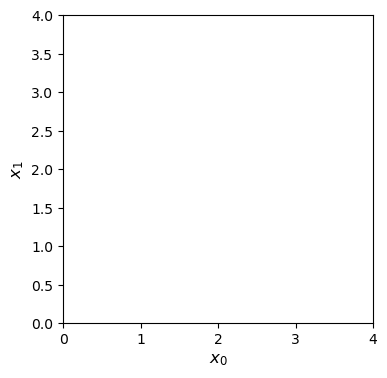

In [71]:
plot_data(X_train , y_train ,ax)
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)


In [73]:
def compute_gd(X,y,w,b):
    m,n = X.shape
    d_w = np.zeros(n)
    d_b = 0
    for i in range(m):
        f_w = sigmoid(np.dot(X[i] , w) +b)
        err_i = (f_w - y[i])
        for j in range(n):
            d_w[j] += err_i * X[i,j]
        d_b += err_i

    d_w = d_w/m
    d_b = d_b/m
    return d_w , d_b

In [75]:
w_temp = np.array([2,3])
b_temp = 1
d_w_tmp , d_b_temp  = compute_gd(X_train , y_train , w_temp , b_temp)
print(f"dj_dw  {d_w_tmp } dj_db {d_b_temp.tolist()}")

dj_dw  [0.49833339 0.49883943] dj_db 0.49861806546328574


In [77]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))
def gd_logistic(X,y,w,b):
    m , n = X.shape
    z= np.dot(X,w) + b
    fw_b = sigmoid(z)
    err = fw_b - y
    dj_w = np.dot(X.T,err)/m
    dj_b = np.sum(err)/m

    return dj_w , dj_b
w_temp = np.array([2,3])
b_temp = 1
temp_w , temp_b = gd_logistic(X_train,y_train,w_temp,b_temp)

In [79]:
print(temp_w , temp_b)


[0.49833339 0.49883943] 0.49861806546328574


In [81]:
import math
import copy
def gradient_Decent(X , y,lr ,  in_w , in_b,iteration):
    J_history =[]
    w = copy.deepcopy(in_w)
    b = in_b
    for i in range(iteration):
        d_w , d_b = gd_logistic(X,y,w,b)
        w -=  lr * d_w
        b -= lr  *d_b
        if i<10000:
            J_history.append(compute_gd(X,y,w,b))
        if i% math.ceil(iteration / 10) == 0:
            print(f'Iteration {i:4d} , Cost {J_history[-1]}')
    return w,b,J_history


In [83]:
lr = 0.5
temp_w = np.zeros(X_train.shape[1])
temp_b = 0
iteration_ = 1000
out_w , out_b, J_history = gradient_Decent(X_train,y_train,lr , temp_w , temp_b , iteration_)



Iteration    0 , Cost (array([-0.12386248, -0.0643895 ]), 0.07393617403960073)
Iteration  100 , Cost (array([-0.01832031, -0.01898139]), 0.05343839026913488)
Iteration  200 , Cost (array([-0.01149019, -0.0117343 ]), 0.032751882869234285)
Iteration  300 , Cost (array([-0.0082279 , -0.00834961]), 0.023214898585283656)
Iteration  400 , Cost (array([-0.00636915, -0.00644091]), 0.017870123294925155)
Iteration  500 , Cost (array([-0.00518084, -0.00522775]), 0.014485032462643687)
Iteration  600 , Cost (array([-0.00435966, -0.00439255]), 0.012159806958426242)
Iteration  700 , Cost (array([-0.00375985, -0.00378409]), 0.010468478916486806)
Iteration  800 , Cost (array([-0.00330326, -0.00332182]), 0.009184967380701686)
Iteration  900 , Cost (array([-0.00294446, -0.00295909]), 0.008178685348516826)


### Another Data Set to Check Decision Boundry of Logistic Regresion and also Cost , Gradient with Regularization

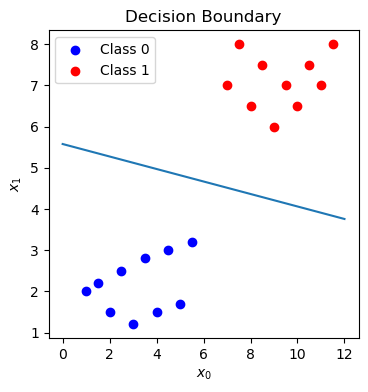

In [86]:
X_d = np.array([[1, 2], [2, 1.5], [3, 1.2], [4, 1.5], [5, 1.7], [1.5, 2.2], [2.5, 2.5], [3.5, 2.8], [4.5, 3], [5.5, 3.2],
              [7, 7], [8, 6.5], [9, 6], [10, 6.5], [11, 7], [7.5, 8], [8.5, 7.5], [9.5, 7], [10.5, 7.5], [11.5, 8]])
y_d = np.array([0]*10 + [1]*10)  # 0 for blue, 1 for red
w1 = 0.0838
w2 = 0.5524
b = -3.0818
x1 = np.linspace(0, 12, 100)
x2 = -(b + w1 * x1) / w2


plt.figure(figsize=(4,4))
plt.scatter(X_d[y_d==0][:, 0], X_d[y_d==0][:, 1], color='blue', label='Class 0')
plt.scatter(X_d[y_d==1][:, 0], X_d[y_d==1][:, 1], color='red', label='Class 1')
plt.plot(x1,x2)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.title('Decision Boundary')
plt.show()

### Cost of Logistic Regression with lambda

In [92]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))
def compute_cost_logistic_reg(X,y,w,b,lambda_=1):
    cost = 0
    m,n  = X.shape
    for i in range(m):
        z = np.dot(X[i],w) +b
        cost +=  -(y[i] * np.log(sigmoid(z))  +( 1-y[i]) * np.log(sigmoid(z)))/m
    
    reg_cost = 0
    for j in range(n):
        reg_cost +=  w[j]**2 * (lambda_)/(2* m) 
   
    total_cost = cost +reg_cost
    return total_cost        

In [98]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
b_tmp = 0.5
lambda_ = 0.7
w_tmp = np.random.rand(x_tmp.shape[1]).reshape(-1)-0.5
output = compute_cost_logistic_reg(X_tmp , y_tmp , w_tmp , b_tmp ,lambda_ )
output

0.5559855452621814

### Gradient of Logistic Regression with Lambda

In [102]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)  # Initialize gradient for weights
    dj_db = 0.0  # Initialize gradient for bias

    # Vectorized implementation
    err = sigmoid(np.dot(X, w) + b) - y  # (m, 1)

    dj_dw = (1/m) * np.dot(X.T, err) + (lambda_/m) * w  # Gradient for weights
    dj_db = (1/m) * np.sum(err)  # Gradient for bias

    return dj_db, dj_dw


In [104]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.34179899497279104
Regularized dj_dw:
 [0.17380012933994293, 0.3200750788156695, 0.10776313396851499]
